<a href="https://colab.research.google.com/github/glondonot/AlgorithmsUN2023I/blob/main/Lab4/GlondonotGroup16Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Overwriting APlusB.cpp


In [ ]:
!g++ APlusB.cpp -o APlusB
!./APlusB

^C


### Test input output files

In [ ]:
%%writefile input1.txt
2 7

Writing input1.txt


In [ ]:
%%writefile output1.txt
9

Writing output1.txt


In [ ]:
%%writefile input2.txt
-5 -2

Writing input2.txt


In [ ]:
%%writefile output2.txt
-7

Writing output2.txt


In [ ]:
!./APlusB < input1.txt

9

In [ ]:
!./APlusB < input2.txt

-7

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

-7


In [ ]:
!grep -xvFf output2.txt output1.txt 

9


In [ ]:
!./APlusB <input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./APlusB <input2.txt> ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [ ]:
!python sum.py

Traceback (most recent call last):
  File "/content/sum.py", line 7, in <module>
    a, b = map(int, input().split())
KeyboardInterrupt
^C


In [ ]:
!python sum.py <input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py <input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [ ]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

^C


### Test 1: Small numbers

In [ ]:
%%writefile input1.txt
10
2 3 4 5 6 7 8 9 10 11

Overwriting input1.txt


In [ ]:
!./max_pairwise_product < input1.txt

110


### Test 2: largest input numbers 200000 200000 in the input

In [ ]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [ ]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

110
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [ ]:
%%writefile random_stress_test.cpp
#include <stdio.h>
#include <stdlib.h>
#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
    ofstream MyFile("input3.txt");
    int n = 20;
    srand(time_t(0));
    MyFile << 20 << endl;
    // Generate n random numbers
    for (int i = 0; i < n; i++) {
        int num = rand() % 19;
        MyFile << num << " " ;
    }
    MyFile.close();
    return 0;
}

Writing random_stress_test.cpp


In [ ]:
!g++ random_stress_test.cpp -o random_stress_test
!./random_stress_test

In [ ]:
file1 = open("input3.txt", "r")
file1.readlines()

['20\n', '2 15 3 3 10 8 10 11 2 7 1 9 1 10 1 10 7 17 5 9 ']

In [ ]:
!./max_pairwise_product_long < input3.txt

255


### Test 4  time test  measure the execution time running with the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [ ]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Writing Test2Write.cpp


In [ ]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

^C


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [ ]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                                                                                                                            //1
    std::vector<int> numbers(n);                                            
    for (int i = 0; i < n; ++i) {                                           
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";                       
    return 0;                                                              
}  

Writing test_init_vectors.cpp


In [ ]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [ ]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Writing max_pairwise_product_long_execints.cpp


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
4
3
3
2
2
2
2
1
0
287
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
^C


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [ ]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line

In [ ]:
%%writefile efficient_solution.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using namespace std;

int main() {          //N inst exec by line executed
    int m;            //1
    cin >> m;         //1
    vector<int> numbers(m);         //1
    for (int i = 0; i < m; ++i) {         //1+2n
        cin >> numbers[i];          //1
    }

    int n = numbers.size();         //1
    int max_index1 = -1;          //1
    for (int i = 0; i < n; ++i) {         //1+2n
        if ((max_index1 == -1) || (numbers[i] > numbers[max_index1])) {         //1
            max_index1 = i;         //1
        }
    }
    int max_index2 = -1;          //1
    for (int j = 0; j < n; ++j) {         //1+2n
        if ((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2]))) {          //1
            max_index2 = j;         //1
        }
    }
    long long result = ((long long)(numbers[max_index1])) * numbers[max_index2];         //1
    cout << result << endl;         //1
    return 0;         //1
}         // 1+1+1+(1+2n)+n+1+1+(1+2n)+(1+1)n+1+(1+2n)+(1+1)(n-1) = 11n+7

Overwriting efficient_solution.cpp


Test with inputs 1 and 2



In [ ]:
!g++ efficient_solution.cpp -o efficient_solution
!./efficient_solution < input1.txt
print("Executed instructions: ", str(11*10+7))
!./efficient_solution < input2.txt
print("Executed instructions: ", str(11*6+7))

110
Executed instructions:  117
40000000000
Executed instructions:  73


Test and time it with input 3

In [ ]:
!time ./efficient_solution < input3.txt
print("Executed instructions: ", str(11*20+7))

39999800000

real	0m0.054s
user	0m0.050s
sys	0m0.002s
Executed instructions:  227


20 stress tests

In [ ]:
%%writefile efficient_solution_stress.cpp
#include <iostream>
#include <vector>
#include <cstdlib>
#include <ctime>
#include <algorithm>
using namespace std;

int main() {          //N inst exec by line executed
    srand(time(NULL));
    long long ins = 1;
    for (int i = 0; i < 20; ++i) {
        ins+=2;      
        int n = rand() % 19+4;    
        ins++;
        vector<int> numbers(n);    
        ins+=n; 
        for (int j = 0; j < n; ++j) {    
            ins+=2;
            numbers[j] = rand() % 1000;  
            ins++;
        }

        int index = 1;
        ins++;
        for(int j = 2; j < n; j++){
            ins+=2;
            ins++;
            if(numbers[j] > numbers[index]){
                index = j;
                ins++;
            }
            int temp = numbers[index];
            ins++;
            numbers[index] = numbers[n - 1];
            ins++;
            numbers[n - 1] = temp;
            ins++;
        }
        for(int j = 2; j < n - 1; j++){
            ins+=2;
            ins++;
            if(numbers[j] > numbers[index]){
                index = j;
                ins++;
            }
            int temp = numbers[index];
            ins++;
            numbers[index] = numbers[n - 2];
            ins++;
            numbers[n - 2] = temp;
            ins++;
        }
        long long ans = (long long)numbers[n-1] * numbers[n-2];
        ins++;
        for(int j = 0; j < n; j++){
            ins+=2;
            cout << numbers[j] << " ";
            ins++;
        }
        cout << ": MaxPairwiseProduct = " << ans << "\n";
        ins++;
    }
    cout << "\nEXECUTED INSTRUCTIONS: " << ins << endl;
    return 0;
}

Writing efficient_solution_stress.cpp


Count executed instructions in code and verify with inputs 1,2 and 3


In [ ]:
!g++ efficient_solution_stress.cpp -o efficient_solution_stress
!./efficient_solution_stress

649 232 385 265 909 556 994 731 : MaxPairwiseProduct = 726614
303 227 395 182 380 74 667 615 584 746 413 782 64 78 539 332 173 146 827 873 : MaxPairwiseProduct = 721971
744 198 197 381 738 106 646 730 812 641 33 70 36 568 817 110 587 784 46 843 998 : MaxPairwiseProduct = 841314
877 628 568 209 456 720 735 188 478 479 866 27 570 919 921 134 : MaxPairwiseProduct = 123414
329 226 387 561 598 307 569 60 400 705 459 894 706 288 583 532 360 145 903 340 : MaxPairwiseProduct = 307020
880 56 63 153 424 633 436 : MaxPairwiseProduct = 275988
554 426 899 115 165 651 65 472 572 478 366 278 417 424 533 577 360 937 937 : MaxPairwiseProduct = 877969
757 515 692 737 923 800 142 359 786 567 929 989 : MaxPairwiseProduct = 918781
181 807 862 184 : MaxPairwiseProduct = 158608
334 757 703 52 35 640 931 920 217 188 338 506 693 447 21 782 437 828 935 944 : MaxPairwiseProduct = 882640
73 149 585 850 547 118 765 409 924 303 : MaxPairwiseProduct = 279972
412 562 147 799 844 328 719 61 516 57 852 567 : MaxPairwis

Calculate estimated time by instruction and number of instructions by second

In [ ]:
time_by_instruction = 0.38/2956223
print(time_by_instruction)
instructions_by_second = 1/time_by_instruction
print(instructions_by_second)

1.2854240021811615e-07
7779534.2105263155


### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [ ]:
%%writefile super_efficient_solution.cpp
#include <iostream>
#include <ostream>
using namespace std;

int main() {
    int n;        //1
    std::cin >> n;        //1
    int max1 = 0, max2 = 0;         //2
    for (int i = 0; i < n; ++i) {         //n+1
        int x;        //1
        std::cin >> x;        //1
        if (x > max1) {        //1
            max2 = max1;        //1
            max1 = x;        //1
        } else if (x > max2) {        //1
            max2 = x;        //1
        }
    }
    std::cout << (long long) max1 * max2 << std::endl;        //2
    return 0;        //1
}        //1+1+2+(n+1)+(1+1+1+1+1)n+2+1 = 6n+8

Overwriting super_efficient_solution.cpp


Test with inputs 1 and 2


 

In [ ]:
!g++ super_efficient_solution.cpp -o super_efficient_solution
!./super_efficient_solution < input1.txt
print("Executed instructions: ", str(6*10+8))
!./super_efficient_solution < input2.txt
print("Executed instructions: ", str(6*6+8))

110
Executed instructions:  68
40000000000
Executed instructions:  44


Test and time it with input 3

In [ ]:
!time ./super_efficient_solution < input3.txt
print("Executed instructions: ", str(6*20+8))

39999800000

real	0m0.050s
user	0m0.048s
sys	0m0.002s
Executed instructions:  128


20 stress tests 

In [ ]:
%%writefile super_efficient_solution_stress_test.cpp
#include <iostream>
#include <vector>
#include <cstdlib>
#include <ctime>
#include <algorithm>
using namespace std;

int main () {          //N inst exec by line executed
    srand(time(NULL));
    long long ins = 1;
    for (int i = 0; i < 20; ++i) {
        ins+=2;
        int n = rand() % 19+4;
        ins++;
        vector<int> numbers(n);
        ins+=n;
        for (int j = 0; j < n; ++j) {
            ins+=2;
            numbers[j] = rand() % 1000;
            ins++;
        }        

        int index = 1;
        ins++;
        for(int j = 2; j < n; j++){
            ins+=2;
            ins++;
            if(numbers[j] > numbers[index]){
                index = j;
                ins++;
            }
            int temp = numbers[index];
            ins++;
            numbers[index] = numbers[n - 1];
            ins++;
            numbers[n - 1] = temp;
            ins++;
        }
        for(int j = 2; j < n - 1; j++){
            ins+=2;
            ins++;
            if(numbers[j] > numbers[index]){
                index = j;
                ins++;
            }
            int temp = numbers[index];
            ins++;
            numbers[index] = numbers[n - 2];
            ins++;
            numbers[n - 2] = temp;
            ins++;
        }
        long long ans = (long long)numbers[n-1] * numbers[n-2];
        ins++;
        for(int j = 0; j < n; j++){
            ins+=2;
            cout << numbers[j] << " ";
            ins++;
        }
        cout << ": MaxPairwiseProduct = " << ans << "\n";
        ins++;
    }
    cout << "\nEXECUTED INSTRUCTIONS: " << ins << endl;
    return 0;
}

Overwriting super_efficient_solution_stress_test.cpp


Count executed instructions in code and verify with inputs 1,2 and 3

In [ ]:
!g++ super_efficient_solution_stress_test.cpp -o super_efficient_solution_stress_test
!./super_efficient_solution_stress_test

301 227 283 588 715 : MaxPairwiseProduct = 420420
329 280 538 916 : MaxPairwiseProduct = 492808
616 306 481 362 416 331 456 194 205 546 624 817 923 : MaxPairwiseProduct = 754091
469 113 131 343 355 593 9 359 533 644 586 498 477 644 973 : MaxPairwiseProduct = 626612
825 99 369 548 539 725 222 823 916 : MaxPairwiseProduct = 753868
623 17 196 457 993 910 : MaxPairwiseProduct = 903630
254 725 214 199 378 574 734 732 : MaxPairwiseProduct = 537288
582 352 341 713 593 812 167 : MaxPairwiseProduct = 135604
58 81 609 281 158 334 413 781 964 327 : MaxPairwiseProduct = 315228
590 372 161 844 703 375 395 789 301 127 168 166 61 872 507 775 817 674 939 959 978 85 : MaxPairwiseProduct = 83130
366 530 609 131 362 289 92 254 231 70 415 664 126 143 427 822 444 301 435 915 610 : MaxPairwiseProduct = 558150
118 74 477 144 429 489 436 153 63 581 36 25 430 700 593 522 306 666 897 947 : MaxPairwiseProduct = 849459
719 661 146 986 217 : MaxPairwiseProduct = 213962
422 624 809 433 742 651 787 238 80 698 820 58

Calculate estimated time by instruction and number of instructions by second

In [ ]:
time_by_instruction = 0.37/2000008
print(time_by_instruction)
instructions_by_second = 1/time_by_instruction
print(instructions_by_second)

1.8499926000295997e-07
5405427.027027028


# Codeforces problem https://codeforces.com/contest/1619/problem/A 

Solve the problem in Colab, submit the solution to Codeforces and add a screenshoot of the submission.

In [ ]:
%%writefile codeforcesProblem.cpp
#include <iostream>
#include <ostream>

using namespace std;

bool checkSquareWord(string &s)
{
    int length = s.length();
    int halfLength = length / 2;
    if (length % 2 == 1)
    {
        return false;
    }
    for (int i = 0; i < halfLength; i++)
    {
        if (s[i] != s[i + halfLength])
        {
            return false;
        }
    }
    return true;
}

int main()
{
    int n = 0;
    cin >> n;

    for (int i = 0; i < n; ++i)
    {
        string s;
        cin >> s;
        if (checkSquareWord(s))
        {
            cout << "YES" << endl;
        }
        else
        {
            cout << "NO" << endl;
        }
    }

    return 0;
}

Writing codeforcesProblem.cpp


In [ ]:
%%writefile inputCodeforces.txt
10
a
aa
aaa
aaaa
abab
abcabc
abacaba
xxyy
xyyx
xyxy

Writing inputCodeforces.txt


In [ ]:
!g++ codeforcesProblem.cpp -o codeforcesProblem
!./codeforcesProblem < inputCodeforces.txt

NO
YES
NO
YES
YES
YES
NO
NO
NO
YES


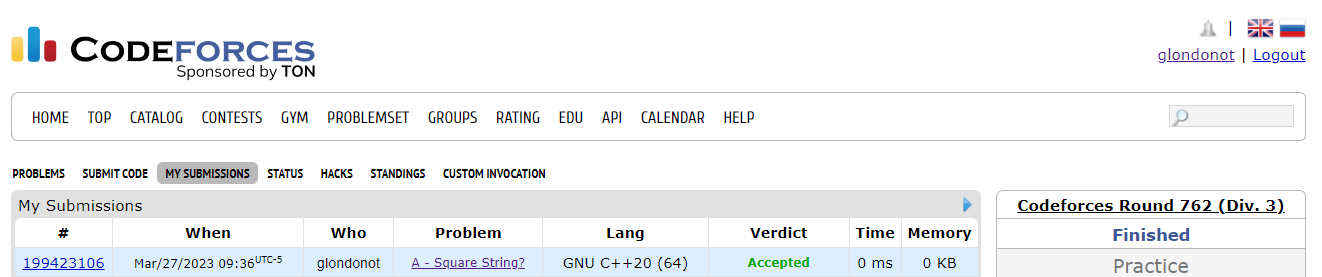